In [1]:
# Importing of Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter

## Data Preprocessing

In [2]:
batch_data_0 = pd.read_csv('/Users/reginaldgonzales/Desktop/GITHUB/DOH_Prediction/dataset/DOH COVID Data Drop_ 20240103 (2020-2023) - 04 Case Information_batch_0.csv', low_memory=False)
batch_data_1 = pd.read_csv('/Users/reginaldgonzales/Desktop/GITHUB/DOH_Prediction/dataset/DOH COVID Data Drop_ 20240103 (2020-2023) - 04 Case Information_batch_1.csv', low_memory=False)
batch_data_2 = pd.read_csv('/Users/reginaldgonzales/Desktop/GITHUB/DOH_Prediction/dataset/DOH COVID Data Drop_ 20240103 (2020-2023) - 04 Case Information_batch_2.csv', low_memory=False)
batch_data_3 = pd.read_csv('/Users/reginaldgonzales/Desktop/GITHUB/DOH_Prediction/dataset/DOH COVID Data Drop_ 20240103 (2020-2023) - 04 Case Information_batch_3.csv', low_memory=False)
batch_data_4 = pd.read_csv('/Users/reginaldgonzales/Desktop/GITHUB/DOH_Prediction/dataset/DOH COVID Data Drop_ 20240103 (2020-2023) - 04 Case Information_batch_4.csv', low_memory=False)

In [3]:
df = pd.concat([batch_data_0, batch_data_1, batch_data_2, batch_data_3, batch_data_4], ignore_index=True)

In [4]:
df.head()

,CaseCode,Age,AgeGroup,Sex,DateSpecimen,DateResultRelease,DateRepConf,DateDied,DateRecover,RemovalType,...,ProvRes,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus,Quarantined,DateOnset,Pregnanttab,ValidationStatus
0,C404174,38.0,35 to 39,FEMALE,NaN,2020-01-30,2020-01-30,NaN,NaN,RECOVERED,...,NEGROS ORIENTAL,DUMAGUETE CITY (CAPITAL),PH074610000,NaN,NaN,RECOVERED,NO,2020-01-21,NO,"Removal Type is ""Recovered"", but no Recovered ..."
1,C462688,44.0,40 to 44,MALE,NaN,2020-01-30,2020-02-03,2020-02-01,NaN,DIED,...,NEGROS ORIENTAL,DUMAGUETE CITY (CAPITAL),PH074610000,NaN,NaN,DIED,NO,2020-01-18,NaN,NaN
2,C387710,60.0,60 to 64,FEMALE,2020-01-23,2020-01-30,2020-02-05,NaN,2020-01-31,RECOVERED,...,BOHOL,PANGLAO,PH071233000,NaN,NaN,RECOVERED,NO,2020-01-21,NO,Case has Admitting Facility but is not Admitte...
3,C377460,49.0,45 to 49,MALE,NaN,NaN,2020-03-06,NaN,NaN,RECOVERED,...,BATANGAS,SANTO TOMAS,PH041028000,NaN,NaN,RECOVERED,NO,NaN,NaN,Case has Admitting Facility but is not Admitte...
4,C498051,63.0,60 to 64,MALE,2020-03-05,NaN,2020-03-06,2020-03-11,NaN,DIED,...,RIZAL,CAINTA,PH045805000,NaN,NaN,DIED,NO,NaN,NaN,Age or Birthdate is Invalid\nCase has Lab Resu...


In [5]:
df.shape

(4136488, 23)

In [6]:
df.columns.tolist()

['CaseCode',
 'Age',
 'AgeGroup',
 'Sex',
 'DateSpecimen',
 'DateResultRelease',
 'DateRepConf',
 'DateDied',
 'DateRecover',
 'RemovalType',
 'DateRepRem',
 'Admitted',
 'RegionRes',
 'ProvRes',
 'CityMunRes',
 'CityMuniPSGC',
 'BarangayRes',
 'BarangayPSGC',
 'HealthStatus',
 'Quarantined',
 'DateOnset',
 'Pregnanttab',
 'ValidationStatus']

In [7]:
df.isnull().sum()

CaseCode                   0
Age                    11898
AgeGroup               11898
Sex                        1
DateSpecimen          975556
DateResultRelease     976231
DateRepConf                0
DateDied             4070302
DateRecover          3404454
RemovalType             1773
DateRepRem              1773
Admitted              173623
RegionRes               3882
ProvRes                57369
CityMunRes            105525
CityMuniPSGC          111496
BarangayRes           369066
BarangayPSGC          374907
HealthStatus               0
Quarantined           115223
DateOnset            2644554
Pregnanttab          2068927
ValidationStatus       46925
dtype: int64

## Feature Selection

In [8]:
doh_df = df[['Sex', 'Age', 'DateOnset', 'DateRecover',
             'DateDied', 'RemovalType', 'DateRepRem',
             'DateResultRelease', 'DateRepConf'
            
            ]]

In [9]:
doh_df.head()

,Sex,Age,DateOnset,DateRecover,DateDied,RemovalType,DateRepRem,DateResultRelease,DateRepConf
0,FEMALE,38.0,2020-01-21,NaN,NaN,RECOVERED,2020-02-07,2020-01-30,2020-01-30
1,MALE,44.0,2020-01-18,NaN,2020-02-01,DIED,2020-02-02,2020-01-30,2020-02-03
2,FEMALE,60.0,2020-01-21,2020-01-31,NaN,RECOVERED,2020-02-05,2020-01-30,2020-02-05
3,MALE,49.0,NaN,NaN,NaN,RECOVERED,2020-03-27,NaN,2020-03-06
4,MALE,63.0,NaN,NaN,2020-03-11,DIED,2020-03-12,NaN,2020-03-06


In [10]:
# Drop rows where 'Age' or 'Sex' is NaN
doh_df = doh_df.dropna(subset=['Age', 'Sex', 'RemovalType'])
doh_df.isnull().sum()
doh_df = doh_df[doh_df['Age'] >= 0]

In [11]:
doh_df.isnull().sum()

Sex                        0
Age                        0
DateOnset            2637370
DateRecover          3392573
DateDied             4056744
RemovalType                0
DateRepRem                 0
DateResultRelease     975334
DateRepConf                0
dtype: int64

In [12]:
doh_df.shape

(4122840, 9)

In [13]:
doh_df.head()

,Sex,Age,DateOnset,DateRecover,DateDied,RemovalType,DateRepRem,DateResultRelease,DateRepConf
0,FEMALE,38.0,2020-01-21,NaN,NaN,RECOVERED,2020-02-07,2020-01-30,2020-01-30
1,MALE,44.0,2020-01-18,NaN,2020-02-01,DIED,2020-02-02,2020-01-30,2020-02-03
2,FEMALE,60.0,2020-01-21,2020-01-31,NaN,RECOVERED,2020-02-05,2020-01-30,2020-02-05
3,MALE,49.0,NaN,NaN,NaN,RECOVERED,2020-03-27,NaN,2020-03-06
4,MALE,63.0,NaN,NaN,2020-03-11,DIED,2020-03-12,NaN,2020-03-06


## Feature Engineering

In [14]:
# Add a new column named "COVID Positive Dates" to record the dates someone had COVID.
doh_df['DateOnset'] = pd.to_datetime(doh_df['DateOnset'], errors='coerce', format='%Y-%m-%d')
doh_df['DateRecover'] = pd.to_datetime(doh_df['DateRecover'], errors='coerce', format='%Y-%m-%d')
doh_df['DateDied'] = pd.to_datetime(doh_df['DateDied'], errors='coerce', format='%Y-%m-%d')
doh_df['DateRepRem'] = pd.to_datetime(doh_df['DateRepRem'], errors='coerce', format='%Y-%m-%d')
doh_df['DateResultRelease'] = pd.to_datetime(doh_df['DateResultRelease'], errors='coerce', format='%Y-%m-%d')
doh_df['DateRepConf'] = pd.to_datetime(doh_df['DateRepConf'], errors='coerce', format='%Y-%m-%d')

In [15]:
doh_df.head()

,Sex,Age,DateOnset,DateRecover,DateDied,RemovalType,DateRepRem,DateResultRelease,DateRepConf
0,FEMALE,38.0,2020-01-21,NaT,NaT,RECOVERED,2020-02-07,2020-01-30,2020-01-30
1,MALE,44.0,2020-01-18,NaT,2020-02-01,DIED,2020-02-02,2020-01-30,2020-02-03
2,FEMALE,60.0,2020-01-21,2020-01-31,NaT,RECOVERED,2020-02-05,2020-01-30,2020-02-05
3,MALE,49.0,NaT,NaT,NaT,RECOVERED,2020-03-27,NaT,2020-03-06
4,MALE,63.0,NaT,NaT,2020-03-11,DIED,2020-03-12,NaT,2020-03-06


In [16]:
def calculate_duration(row):
    start_date = row['DateOnset']
    if pd.isna(start_date):
        start_date = row['DateResultRelease']
    if pd.isna(start_date):
        start_date = row['DateRepConf']
    
    end_date = row['DateRecover']
    if pd.isna(end_date):
        end_date = row['DateRepRem']

    if pd.notna(start_date) and pd.notna(end_date):
        duration = (end_date - start_date).days
        if duration < 0:  # Add a check to handle negative durations
            return None  
        return duration
    else:
        return None

doh_df['CovidDuration'] = doh_df.apply(calculate_duration, axis=1)

In [17]:
# Creating a Age Group
bins = [0, 18, 35, 60, 118]
labels = ['0-18', '19-35', '36-60', '61+']
doh_df['Age'] = pd.to_numeric(doh_df['Age'], errors='coerce')
doh_df['AgeGroup'] = pd.cut(doh_df['Age'], bins=bins, labels=labels, include_lowest=True, right=True)

In [18]:
# Factor in the Sex
average_durations_by_sex_and_age = doh_df.groupby(['Sex', 'AgeGroup'], observed=True)['CovidDuration'].mean().to_dict()
average_durations_by_age = doh_df.groupby('AgeGroup', observed=True)['CovidDuration'].mean().to_dict()

In [19]:
doh_df.head()

,Sex,Age,DateOnset,DateRecover,DateDied,RemovalType,DateRepRem,DateResultRelease,DateRepConf,CovidDuration,AgeGroup
0,FEMALE,38.0,2020-01-21,NaT,NaT,RECOVERED,2020-02-07,2020-01-30,2020-01-30,17.0,36-60
1,MALE,44.0,2020-01-18,NaT,2020-02-01,DIED,2020-02-02,2020-01-30,2020-02-03,15.0,36-60
2,FEMALE,60.0,2020-01-21,2020-01-31,NaT,RECOVERED,2020-02-05,2020-01-30,2020-02-05,10.0,36-60
3,MALE,49.0,NaT,NaT,NaT,RECOVERED,2020-03-27,NaT,2020-03-06,21.0,36-60
4,MALE,63.0,NaT,NaT,2020-03-11,DIED,2020-03-12,NaT,2020-03-06,6.0,61+


## Imputing

In [20]:
# Reducing the Values Exceeding 30 and to fill in Missing Values in CovidDuration
def impute_duration(row):
    if pd.isna(row['CovidDuration']):
        
        return average_durations_by_sex_and_age.get((row['Sex'], row['AgeGroup']), np.nan)  # Use NaN as fallback
    elif row['CovidDuration'] > 30:

        return average_durations_by_age.get(row['AgeGroup'], row['CovidDuration'])  # Fallback to original if no average
    else:
        return row['CovidDuration']


doh_df['CovidDuration'] = doh_df.apply(impute_duration, axis=1)

In [21]:
print(f"{doh_df[['Sex', 'Age', 'AgeGroup', 'CovidDuration']].head()}")

      Sex   Age AgeGroup  CovidDuration
0  FEMALE  38.0    36-60           17.0
1    MALE  44.0    36-60           15.0
2  FEMALE  60.0    36-60           10.0
3    MALE  49.0    36-60           21.0
4    MALE  63.0      61+            6.0


In [22]:
count_over_30 = (doh_df['CovidDuration'] > 30).sum()
print(f'Number of entries with CovidDuration greater than 30 days: {count_over_30}')

Number of entries with CovidDuration greater than 30 days: 0


In [23]:
doh_df.isnull().sum()

Sex                        0
Age                        0
DateOnset            2690211
DateRecover          3393511
DateDied             4057210
RemovalType                0
DateRepRem            134046
DateResultRelease    1107829
DateRepConf           134046
CovidDuration              0
AgeGroup                   0
dtype: int64

In [24]:
# Remove the Decimals
doh_df['CovidDuration'] = doh_df['CovidDuration'].round().astype(int)

In [25]:
doh_df.head()

,Sex,Age,DateOnset,DateRecover,DateDied,RemovalType,DateRepRem,DateResultRelease,DateRepConf,CovidDuration,AgeGroup
0,FEMALE,38.0,2020-01-21,NaT,NaT,RECOVERED,2020-02-07,2020-01-30,2020-01-30,17,36-60
1,MALE,44.0,2020-01-18,NaT,2020-02-01,DIED,2020-02-02,2020-01-30,2020-02-03,15,36-60
2,FEMALE,60.0,2020-01-21,2020-01-31,NaT,RECOVERED,2020-02-05,2020-01-30,2020-02-05,10,36-60
3,MALE,49.0,NaT,NaT,NaT,RECOVERED,2020-03-27,NaT,2020-03-06,21,36-60
4,MALE,63.0,NaT,NaT,2020-03-11,DIED,2020-03-12,NaT,2020-03-06,6,61+


## Explanatory Data Analysis

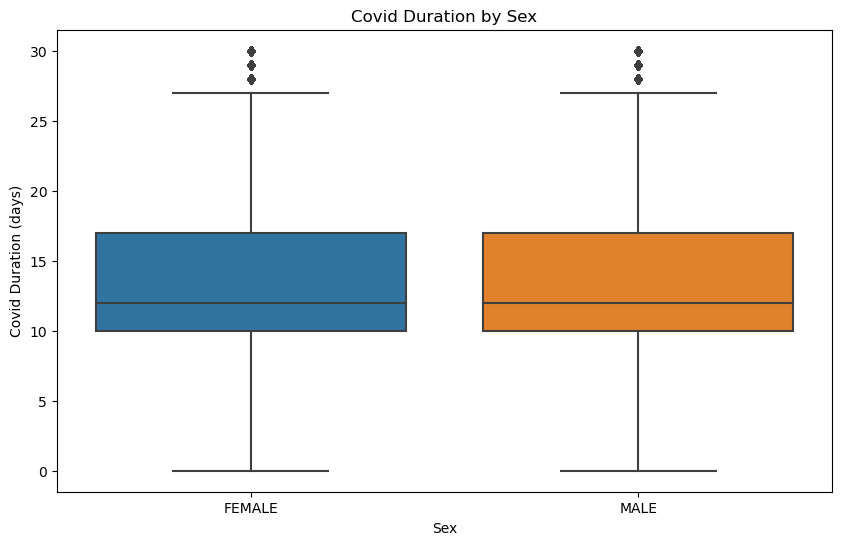

In [26]:
# Boxplot for 'CovidDuration' by 'Sex'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='CovidDuration', data=doh_df)
plt.title('Covid Duration by Sex')
plt.xlabel('Sex')
plt.ylabel('Covid Duration (days)')
plt.show()

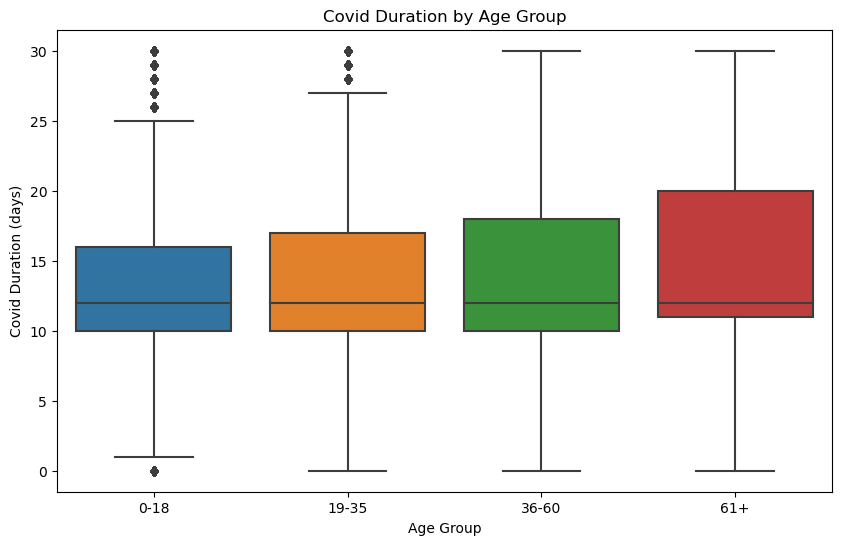

In [27]:
# Boxplot for 'CovidDuration' by 'AgeGroup'
plt.figure(figsize=(10, 6))
sns.boxplot(x='AgeGroup', y='CovidDuration', data=doh_df)
plt.title('Covid Duration by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Covid Duration (days)')
plt.show()

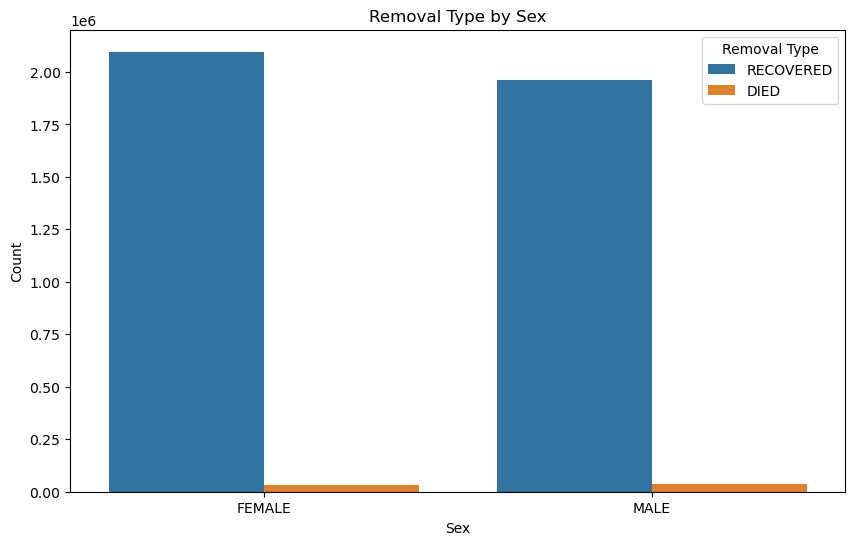

In [28]:
# Since 'RemovalType' is a categorical variable, we use seaborn's countplot instead of a boxplot
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='RemovalType', data=doh_df)
plt.title('Removal Type by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Removal Type')
plt.show()

In [29]:
doh_df['event_observed'] = doh_df['RemovalType'].apply(lambda x: 1 if x == 'DIED' else 0)

date_columns = ['DateOnset', 'DateRecover', 'DateDied', 'DateRepRem', 'DateResultRelease', 'DateRepConf']
for col in date_columns:
    doh_df[col] = pd.to_datetime(doh_df[col], errors='coerce')

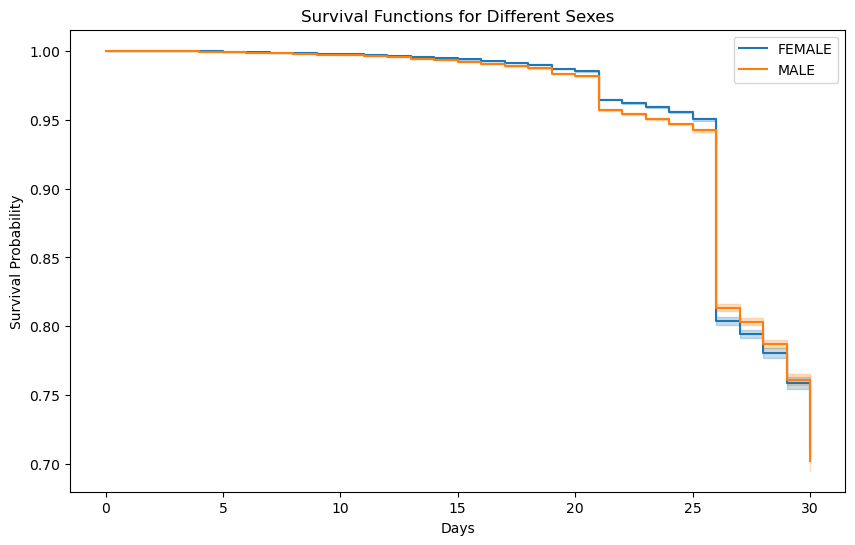

In [30]:
kmf = KaplanMeierFitter()

fig, ax = plt.subplots(figsize=(10, 6))

for sex in doh_df['Sex'].unique():
    mask = doh_df['Sex'] == sex
    duration = doh_df.loc[mask, 'CovidDuration']
    event_observed = doh_df.loc[mask, 'event_observed']

    kmf.fit(duration, event_observed, label=sex)
    kmf.plot_survival_function(ax=ax)

plt.title('Survival Functions for Different Sexes')
plt.xlabel('Days')
plt.ylabel('Survival Probability')
plt.show()

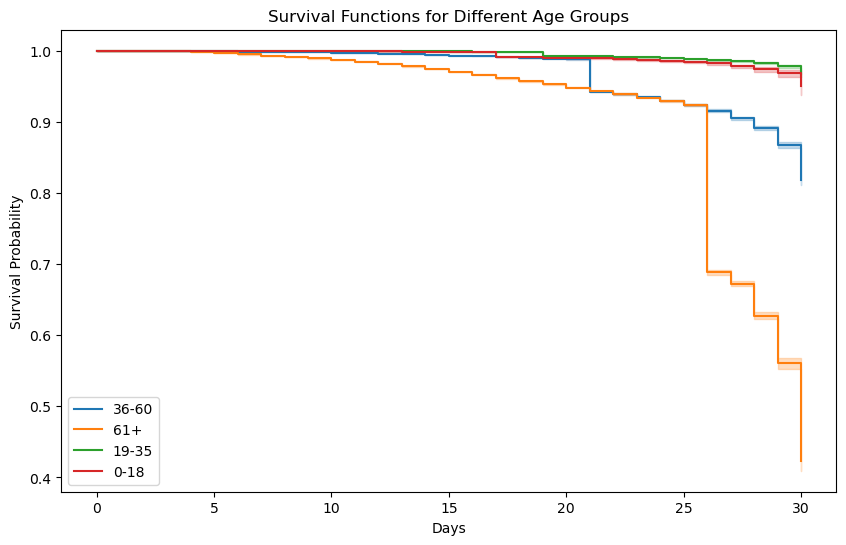

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))

for group in doh_df['AgeGroup'].unique():
    mask = doh_df['AgeGroup'] == group
    duration = doh_df.loc[mask, 'CovidDuration']
    event_observed = doh_df.loc[mask, 'event_observed']

    kmf.fit(duration, event_observed, label=group)
    kmf.plot_survival_function(ax=ax)

plt.title('Survival Functions for Different Age Groups')
plt.xlabel('Days')
plt.ylabel('Survival Probability')
plt.show()